In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



url = "/content/drive/MyDrive/Colab Notebooks/data/airbnb/airbnb_listing_train.csv"
df = pd.read_csv(url)
df.head()
df2 = df.copy()

In [ ]:
#EDA and data visualisation
df.shape

(12901, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [ ]:
df.drop(['neighbourhood_group'], axis=1, inplace = True)


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [ ]:
df.head()
duplicate = df[df.duplicated()]
duplicate

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
price                               int64
dtype: object

In [ ]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
#preprocessing
#mapping of categorical column and converting to numerical
mapproom = {'Hotel room':0,'Shared room':1,'Private room':2,'Entire home/apt':3}
df.room_type = df.room_type.map(mapproom)
mappneighbour = {'De Pijp - Rivierenbuurt':0, 'Oud-Oost':1, 'Centrum-West':2,
       'Westerpark':3, 'Centrum-Oost':4, 'De Baarsjes - Oud-West':5,
       'Noord-West':6, 'Bos en Lommer':7,
       'Oostelijk Havengebied - Indische Buurt':8, 'Bijlmer-Centrum':9,
       'Watergraafsmeer':10, 'Slotervaart':11, 'Geuzenveld - Slotermeer':12,
       'Oud-Noord':13, 'Buitenveldert - Zuidas':14, 'Zuid':15,
       'IJburg - Zeeburgereiland':16, 'Osdorp':17, 'Noord-Oost':18,
       'De Aker - Nieuw Sloten':19, 'Gaasperdam - Driemond':20, 'Bijlmer-Oost':21}
df.neighbourhood = df.neighbourhood.map(mappneighbour)
df.drop(axis = 1, columns = ['name','host_name'],inplace = True)
df

,id,host_id,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,3123809,0,52.35368,4.90177,3,3,13,15-02-2020,0.27,1,0,220
1,13289321,10259430,1,52.35728,4.92052,3,4,14,19-06-2019,0.29,1,0,110
2,40779315,224969266,2,52.37582,4.89850,3,2,9,16-03-2020,1.65,1,7,100
3,7820311,693472,3,52.37792,4.87300,3,3,42,17-02-2020,0.72,1,0,130
4,27346603,41888346,3,52.38051,4.87493,2,2,89,26-02-2020,4.02,1,24,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,20757739,63932037,5,52.37194,4.84965,3,1,1,13-09-2017,0.03,1,88,65
12897,1055570,5813322,16,52.36263,4.98031,3,7,238,25-02-2020,2.75,1,357,160
12898,13178435,46370427,0,52.35719,4.90009,3,3,15,07-10-2018,0.31,1,0,180
12899,21963760,4895882,15,52.34855,4.85105,3,2,11,28-04-2019,0.37,1,0,136


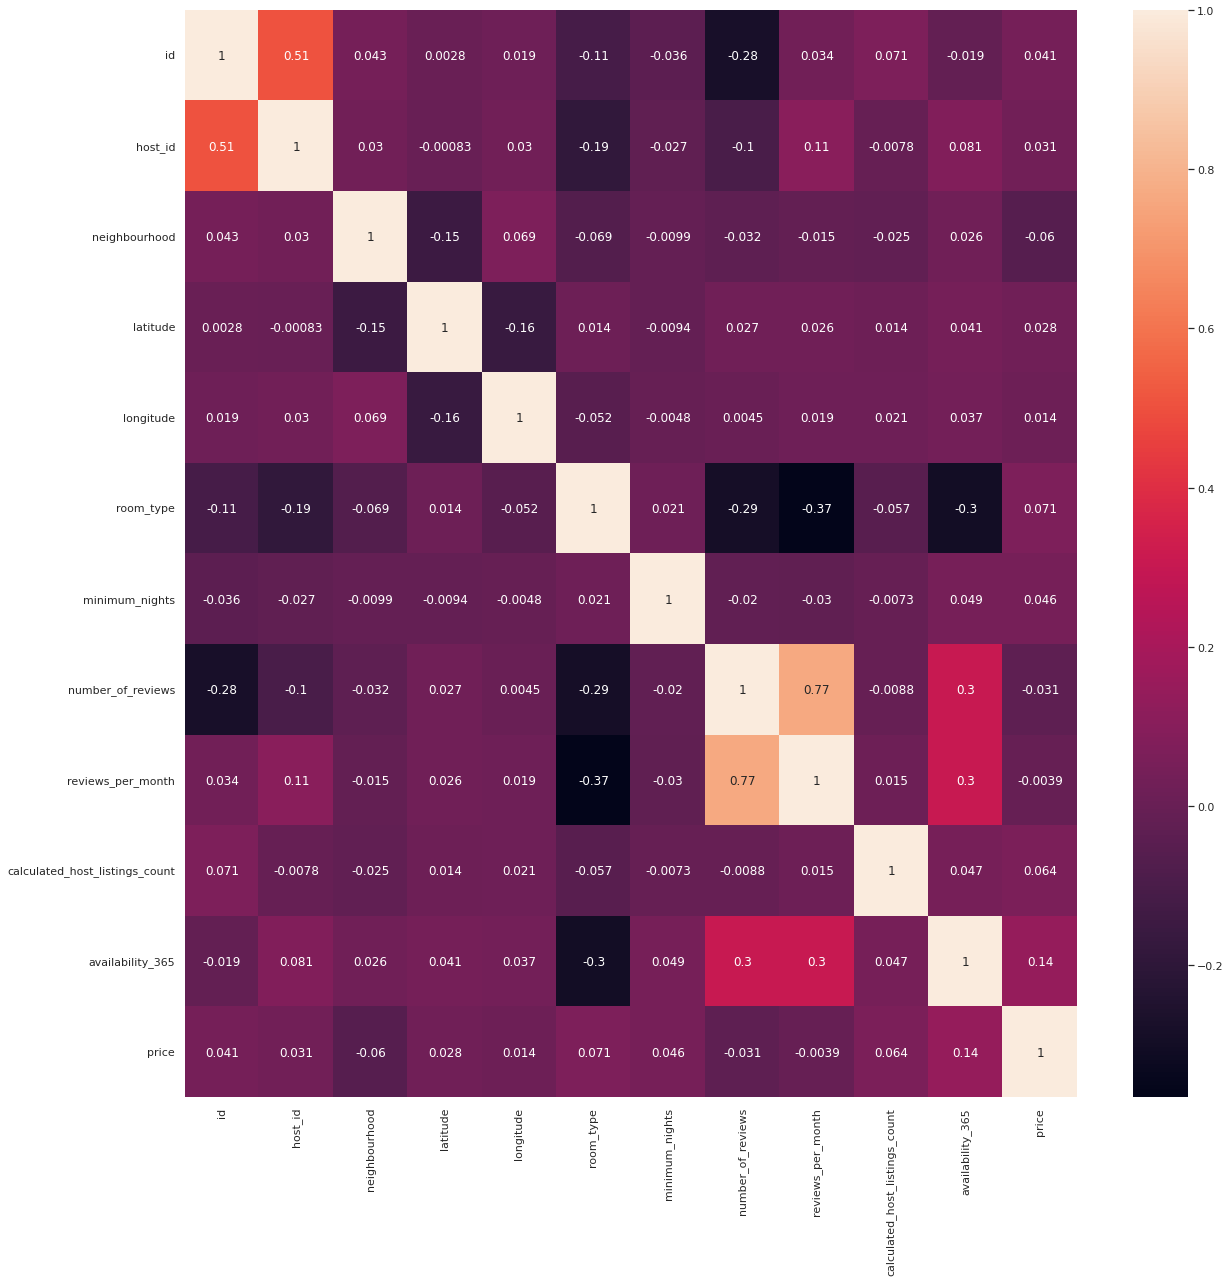

In [ ]:
sns.heatmap(df.corr(),annot = True)
sns.set(rc={'figure.figsize':(20,20)})

In [ ]:
df.head()
featlist = ["id",'host_id','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']
target = ['price']

#defining features and target
X = df[featlist]
y = df[target]

In [ ]:
# model building
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 7)

In [ ]:

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred_linear = linear.predict(X_test)
print("Linear regression Score" ,linear.score(X_test,y_test))

# Random forest
randomf = RandomForestRegressor()
randomf.fit(X_train,y_train)
print(" Random forest Score" ,randomf.score(X_test,y_test))

Linear regression Score 0.017523912981491474


<ipython-input-126-948dca27bf68>:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



 Random forest Score -0.16261045064190816
